In [24]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks
import sympy as sp
from ipywidgets import interact
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

import figures
import data
import imports
import parameters

# Assuming these are custom functions from a local module
# If they're in a separate file, you'll need to import them:
# from your_module import get_parameters, show_solutions, show_3Dfigure_plot, etc.
# Or define them in the notebook before using them

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# The Rössler System\n
\n
The Rössler attractor is a system of three non-linear ordinary differential equations originally studied by Otto Rössler.

The three ODE's known as the Rössler equations are:\n
$$\n
\\begin{align}\n
\\dot{x} &= -y - z \\\\\n
\\dot{y} &= x + ay \\\\\n
\\dot{z} &= b + z(x - c)\n
\\end{align}\n
$$\n
$x$, $y$ and $z$ are functions of time.\n
\n
We can assume that the parameters $a$, $b$ and $c$ are positive.

In [25]:
# ------General parameters-----
a, b, t_min, t_max, dt, initial_condition, initial_conditions = parameters.get_parameters()
print(f"Parameters: a={a}, b={b}")
print(f"Time: t_min={t_min}, t_max={t_max}, dt={dt}")

Parameters: a=0.2, b=0.2
Time: t_min=0.0, t_max=200.0, dt=0.01


## Equilibria and Stability Analysis\n
\n
Let's find the equilibria of the system by solving:\n
$$\n
\\begin{align}\n
-y - z &= 0 \\\\\n
x + ay &= 0 \\\\\n
b + z(x - c) &= 0\n
\\end{align}\n
$$

In [10]:
if __name__ == "__main__":
    data.show_solutions()

Solution 1:
 X = c/2 - sqrt(-4*a*b + c**2)/2 Y = (-c + sqrt(-4*a*b + c**2))/(2*a) Z = c/(2*a) - sqrt(-4*a*b + c**2)/(2*a) 

Solution 2:
 X = c/2 + sqrt(-4*a*b + c**2)/2 Y = (-c - sqrt(-4*a*b + c**2))/(2*a) Z = c/(2*a) + sqrt(-4*a*b + c**2)/(2*a) 



## Jacobian Matrix\n
\n
The Jacobian matrix for the Rössler system is:\n
$$\n
J(x,y,z) = \\begin{pmatrix}\n
0 & -1 & -1 \\\\\n
1 & a & 0 \\\\\n
z & 0 & x - c\n
\\end{pmatrix}\n
$$

## 3D Visualization\n
\n
Let's visualize the Rössler attractor in 3D phase space for a specific value of $c$.

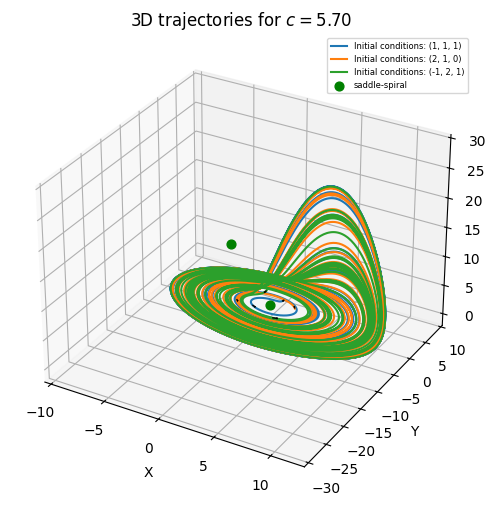

In [26]:
# 3D plot for c = 5.7 (chaotic regime)
figures.show_3Dfigure_plot(c=5.7)

## Bifurcation Diagrams\n
\n
Let's examine how the equilibria change as we vary the parameter $c$.

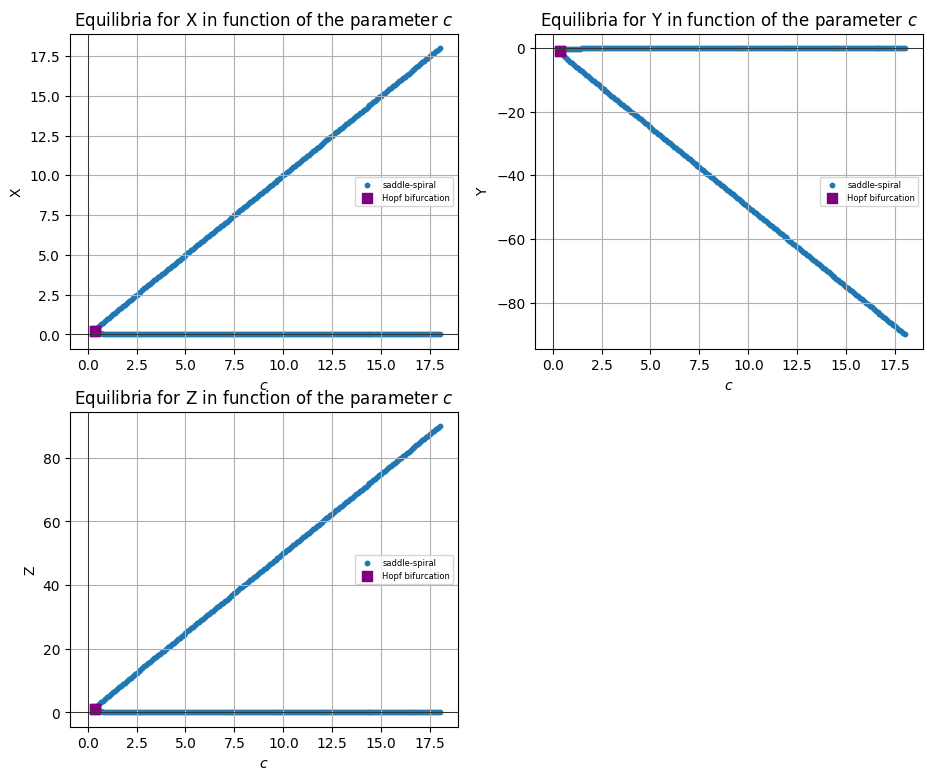

In [12]:
# Get equilibria for different values of c
sols, (x_sym, y_sym, z_sym) = data.get_solutions()
results = data.compute_jacobian_and_stability(sols, x_sym, y_sym, z_sym, small_c=False)

# Show bifurcation diagrams
figures.show_2D_bif_figs(results)

## Time Series\n
\n
Let's plot $x(t)$, $y(t)$, and $z(t)$ for a chaotic parameter value.

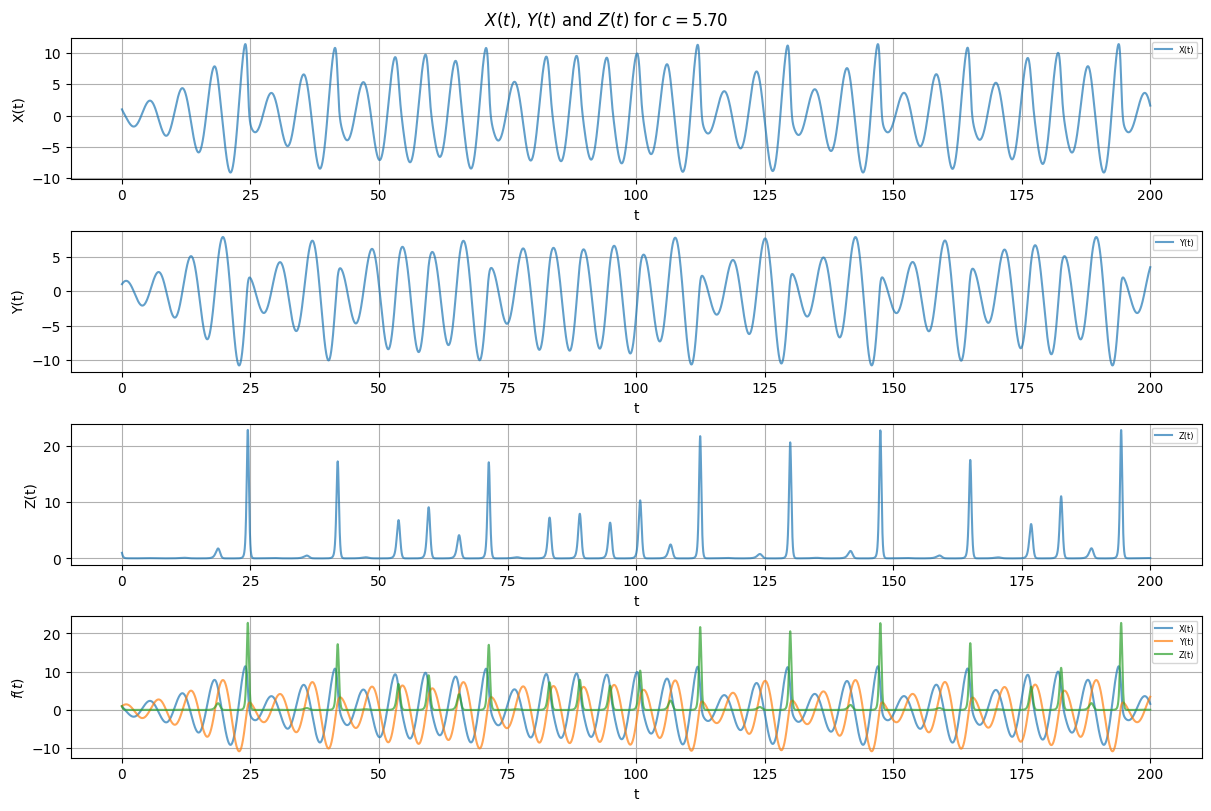

In [13]:
figures.show_4_func_of_t_figs(c=5.7, t_min=0, t_max=200)

## Return Map\n
\n
The Rössler attractor exhibits a characteristic return map from the local maxima of $z(t)$.

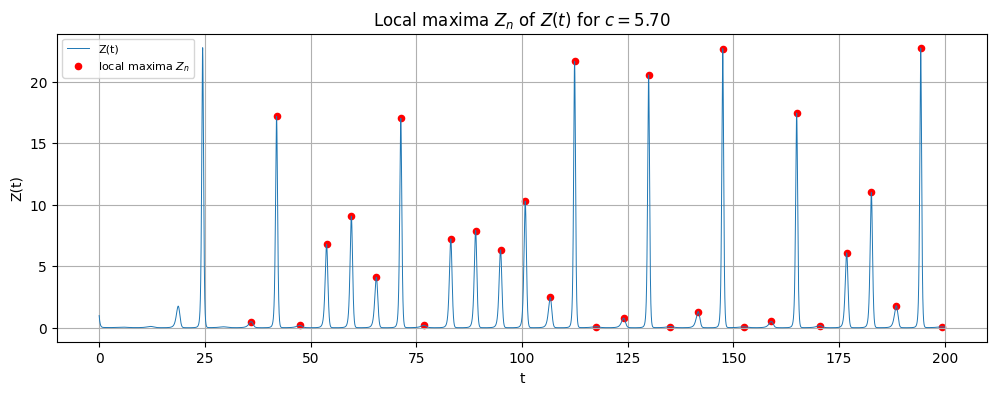

In [18]:
# Plot Z(t) with maxima marked
figures.plot_Z_time_with_maxima(c=5.7, t_min=0, t_max=200)

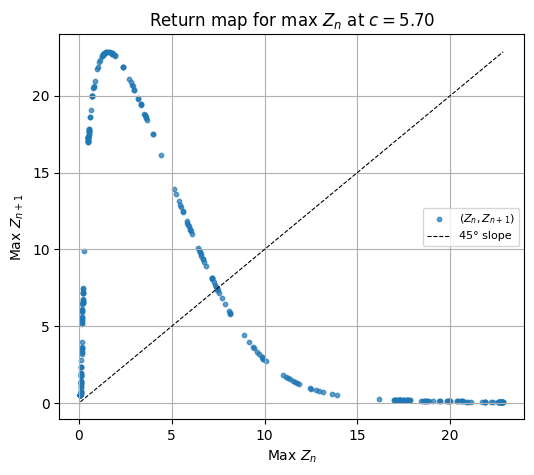

In [19]:
# Plot the return map Z_{n+1} vs Z_n
figures.plot_Zn_vs_Znplus1(c=5.7, t_min=0, t_max=2000)

## Sensitivity to Initial Conditions\n
\n
The Rössler system shows chaotic behavior with high sensitivity to initial conditions.

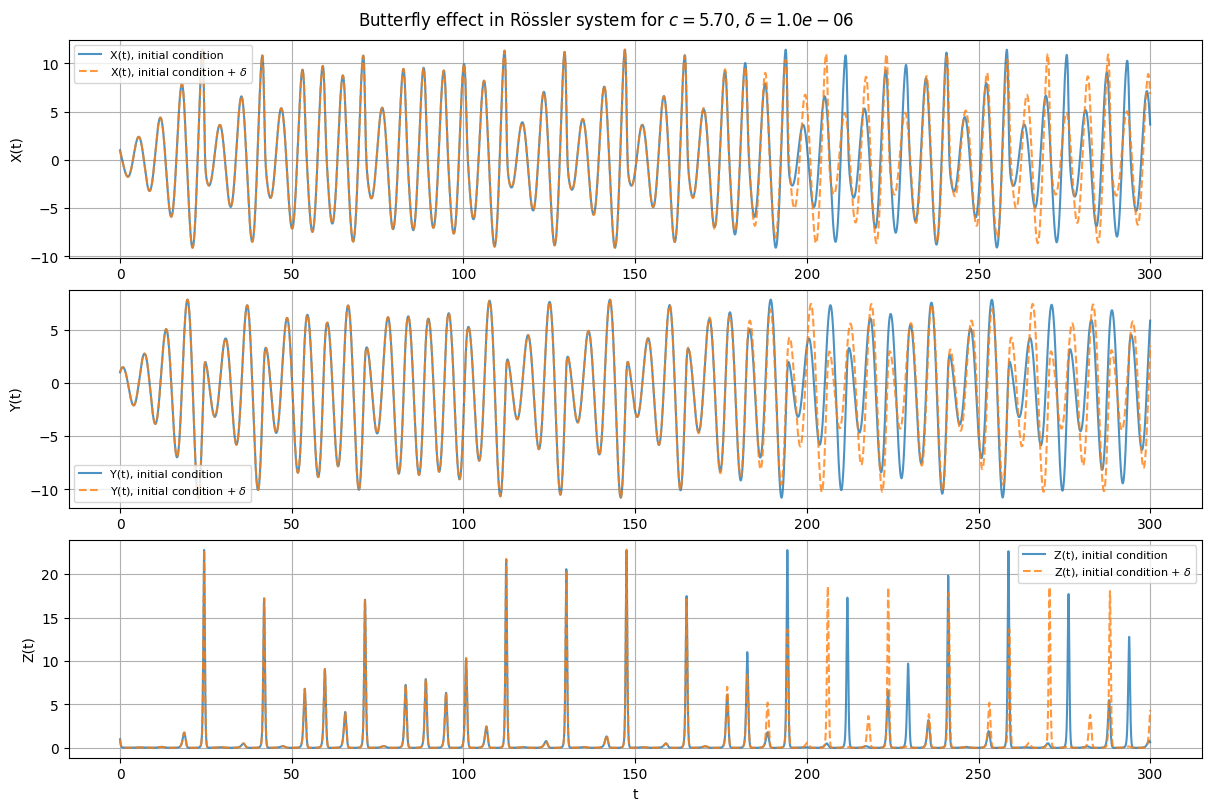

In [28]:
figures.show_butterfly_effect(c=5.7, delta=1e-6, t_min=0, t_max=300)

## Bifurcation Diagram\n
\n
Finally, let's create a numerical bifurcation diagram showing how the long-term behavior changes with $c$.

In [29]:
figures.show_bifurcation_diagram()

/Users/tristancools/Documents/VSC_macbook_tristan/Biophysics/Assignment-2/reuse4exam/figures.py:1113: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = scipy.integrate.odeint(rossler_chaos, init, time_points, args=(c_val, a_val, b_val))


KeyboardInterrupt: 

## Interactive 3D Plot\n
\n
Use the slider to explore how the attractor changes with different values of $c$.

In [23]:
interact(figures.show_3Dfigure_plot, c=(2.0, 10.0, 0.1), small_c=False)

interactive(children=(FloatSlider(value=5.0, description='c', max=10.0, min=2.0), Checkbox(value=False, descri…

<function figures.show_3Dfigure_plot(c=5.0, small_c=False)>

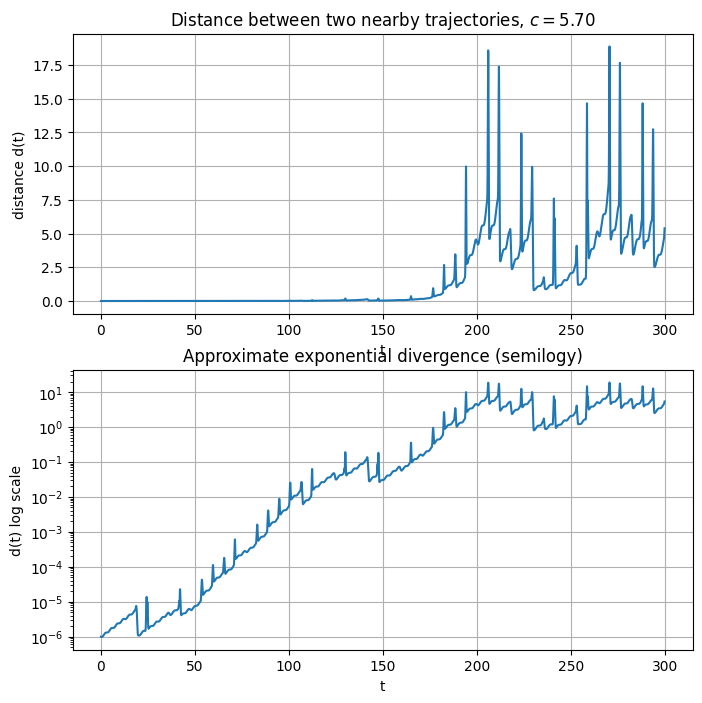

In [31]:
figures.plot_sensitivity_to_initial_conditions(c=5.7, delta=1e-6, t_min=0, t_max=300)

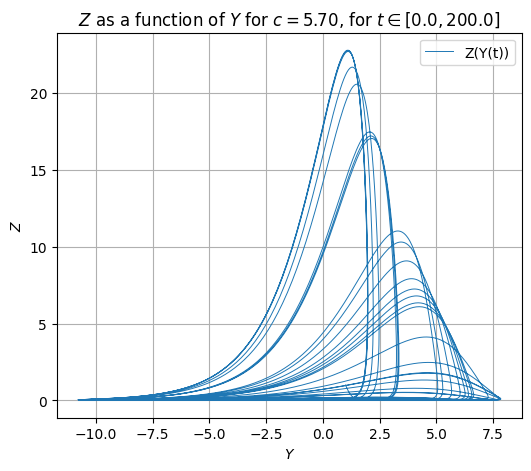

In [32]:
figures.plot_ZvY(c=5.7, t_min=0.0, t_max=200.0 , dt=dt)

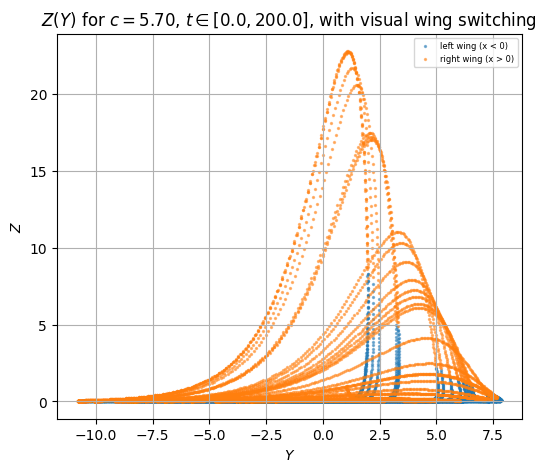

In [33]:
figures.plot_ZvY_wings(c=5.7, t_min=t_min, t_max=t_max, dt=0.01)

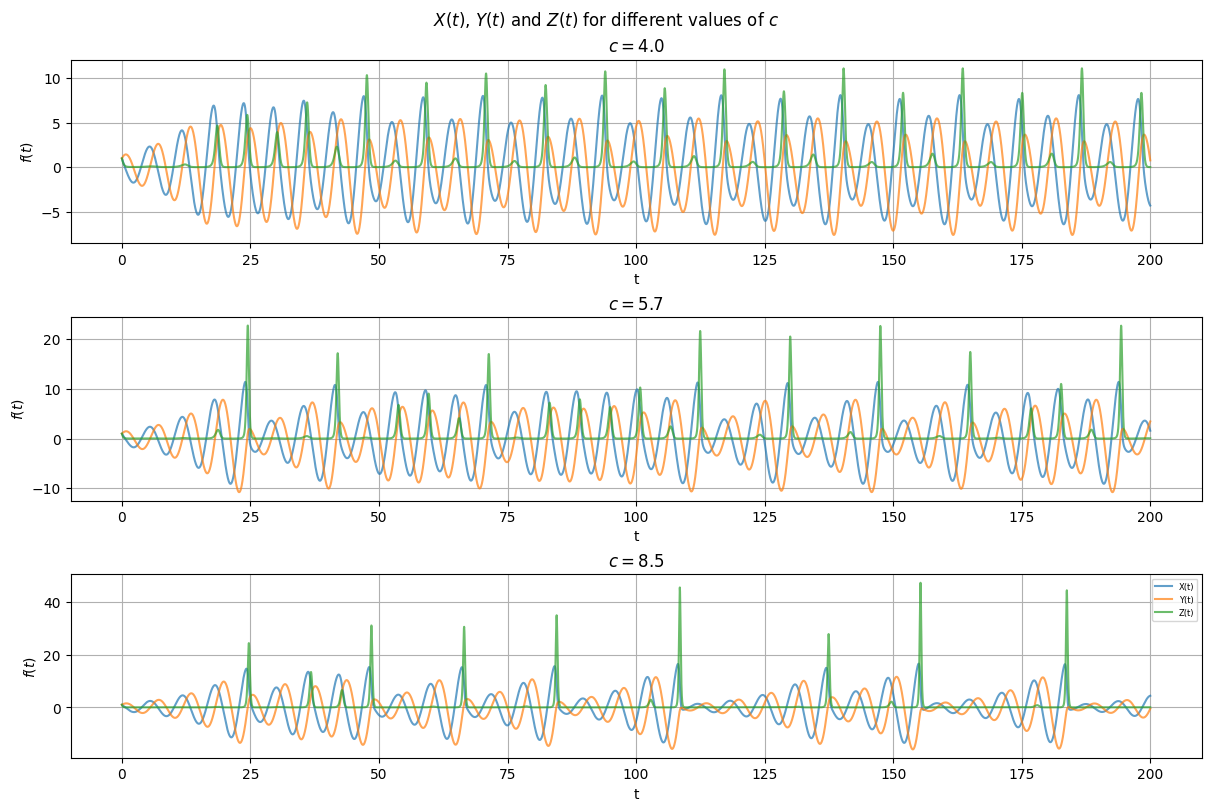

In [36]:
figures.show_diff_c_vals(t_min=t_min, t_max=t_max, dt=dt)

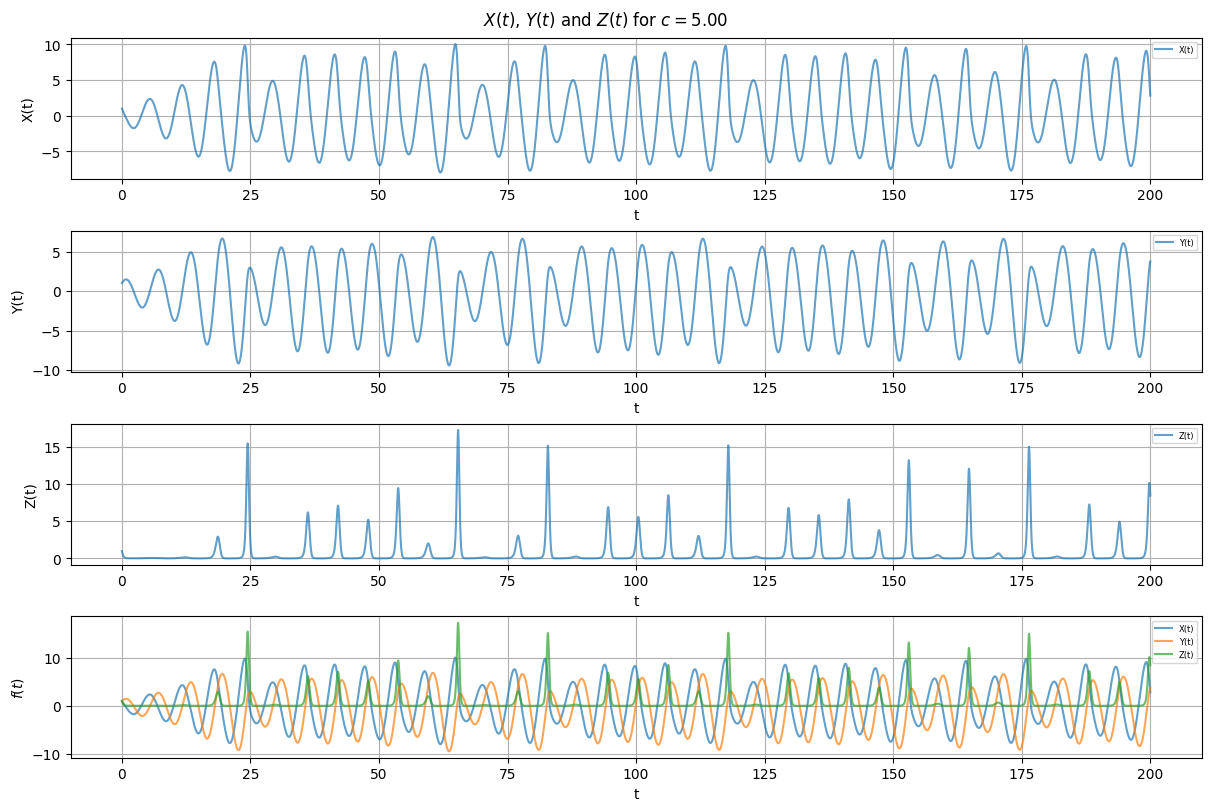

In [37]:
figures.show_4_func_of_t_figs()

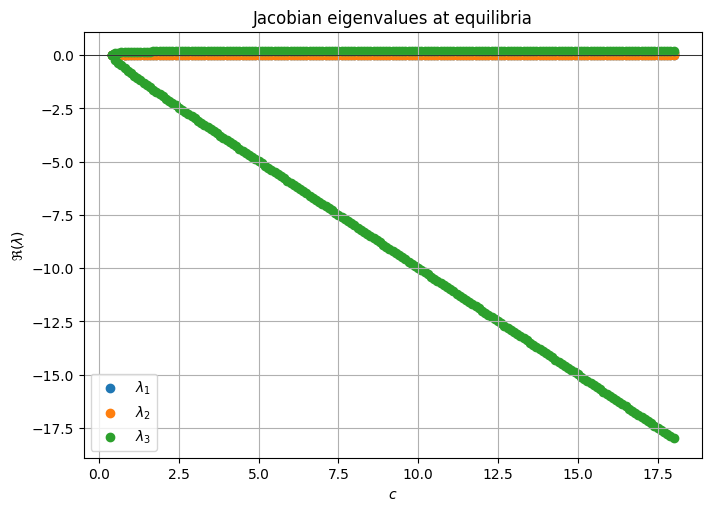

In [40]:
figures.plot_eigvals_vs_c()